<a href="https://colab.research.google.com/github/rizkyprofs/ML_DL/blob/main/ML_Week4_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Library dan Load Dataset

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="whitegrid")
sns.set_palette("husl")

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## 2. Exploratory Data Analysis (EDA)

### 2.1. Overview Dataset

In [ ]:
# Menampilkan informasi dasar dataset
print("Shape Train Dataset:", train_df.shape)
print("\nShape Test Dataset:", test_df.shape)
print("\nInfo Train Dataset:")
train_df.info()

Shape Train Dataset: (1460, 81)

Shape Test Dataset: (1459, 80)

Info Train Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle 

### 2.2. Statistik Deskriptif

In [ ]:
# Menampilkan statistik deskriptif
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 2.3. Pengecekan Missing Values

In [ ]:
# Menghitung missing values
missing_values = train_df.isnull().sum()
missing_percentage = (missing_values / len(train_df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
missing_data[missing_data['Missing Values'] > 0].sort_values('Percentage', ascending=False)


,Missing Values,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


## 3. Feature Engineering

### 3.1. Penanganan Missing Values

In [ ]:
# Fungsi untuk menangani missing values
def handle_missing_values(df):
    # Numeric columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

    # Categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

    return df

# Apply fungsi ke train dan test dataset
train_df = handle_missing_values(train_df)
test_df = handle_missing_values(test_df)

### 3.2. Encoding Categorical Variables

In [ ]:
# Fungsi untuk encoding categorical variables
def encode_categorical(df):
    le = LabelEncoder()
    categorical_cols = df.select_dtypes(include=['object']).columns

    for col in categorical_cols:
        df[col] = le.fit_transform(df[col].astype(str))

    return df

# Apply encoding
train_df = encode_categorical(train_df)
test_df = encode_categorical(test_df)

## 4. Data Visualization

### 4.1. Distribusi Target Variable (SalePrice)

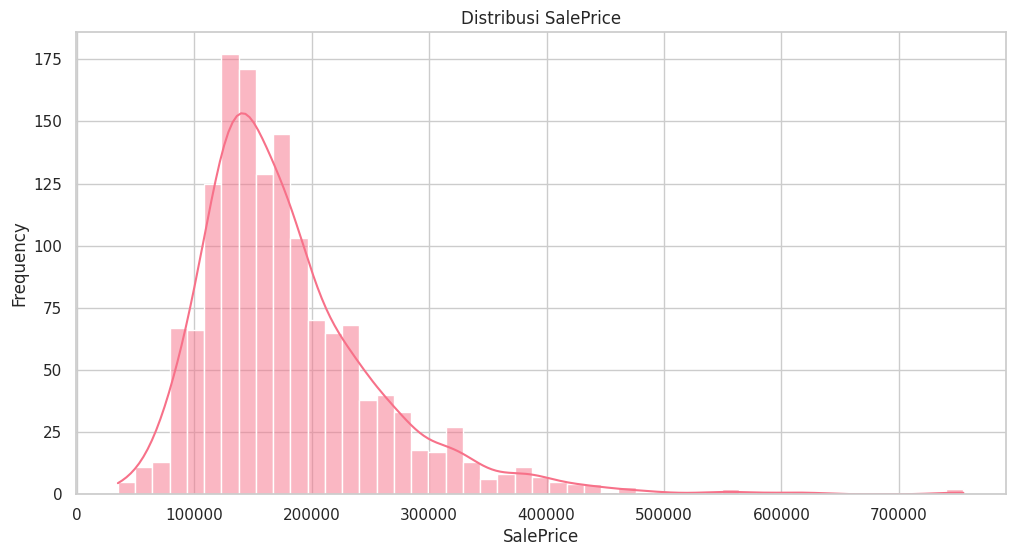

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribusi SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

### 4.2. Korelasi antar Features

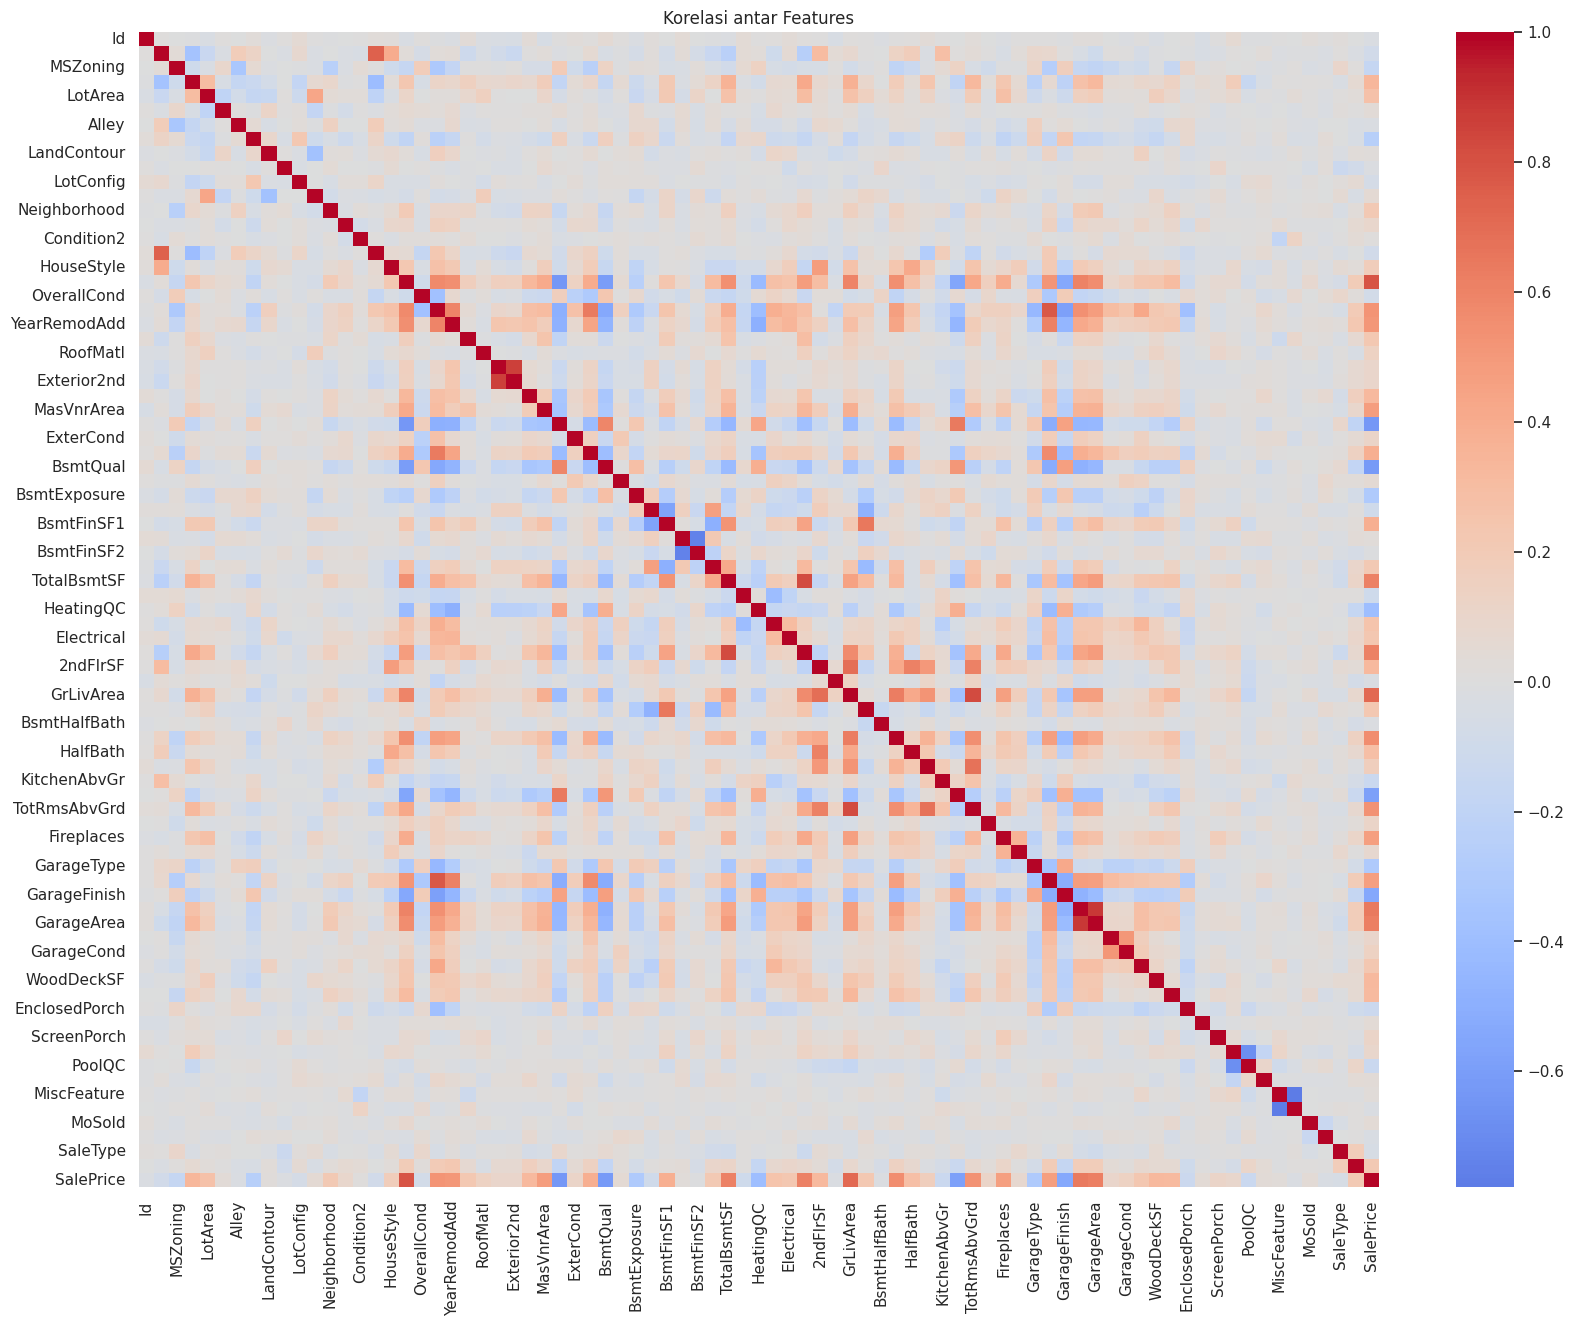

In [ ]:
# Menghitung korelasi
correlation_matrix = train_df.corr()

# Visualisasi heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Korelasi antar Features')
plt.show()

### 4.3. Scatter Plot untuk Features yang Berkorelasi Tinggi

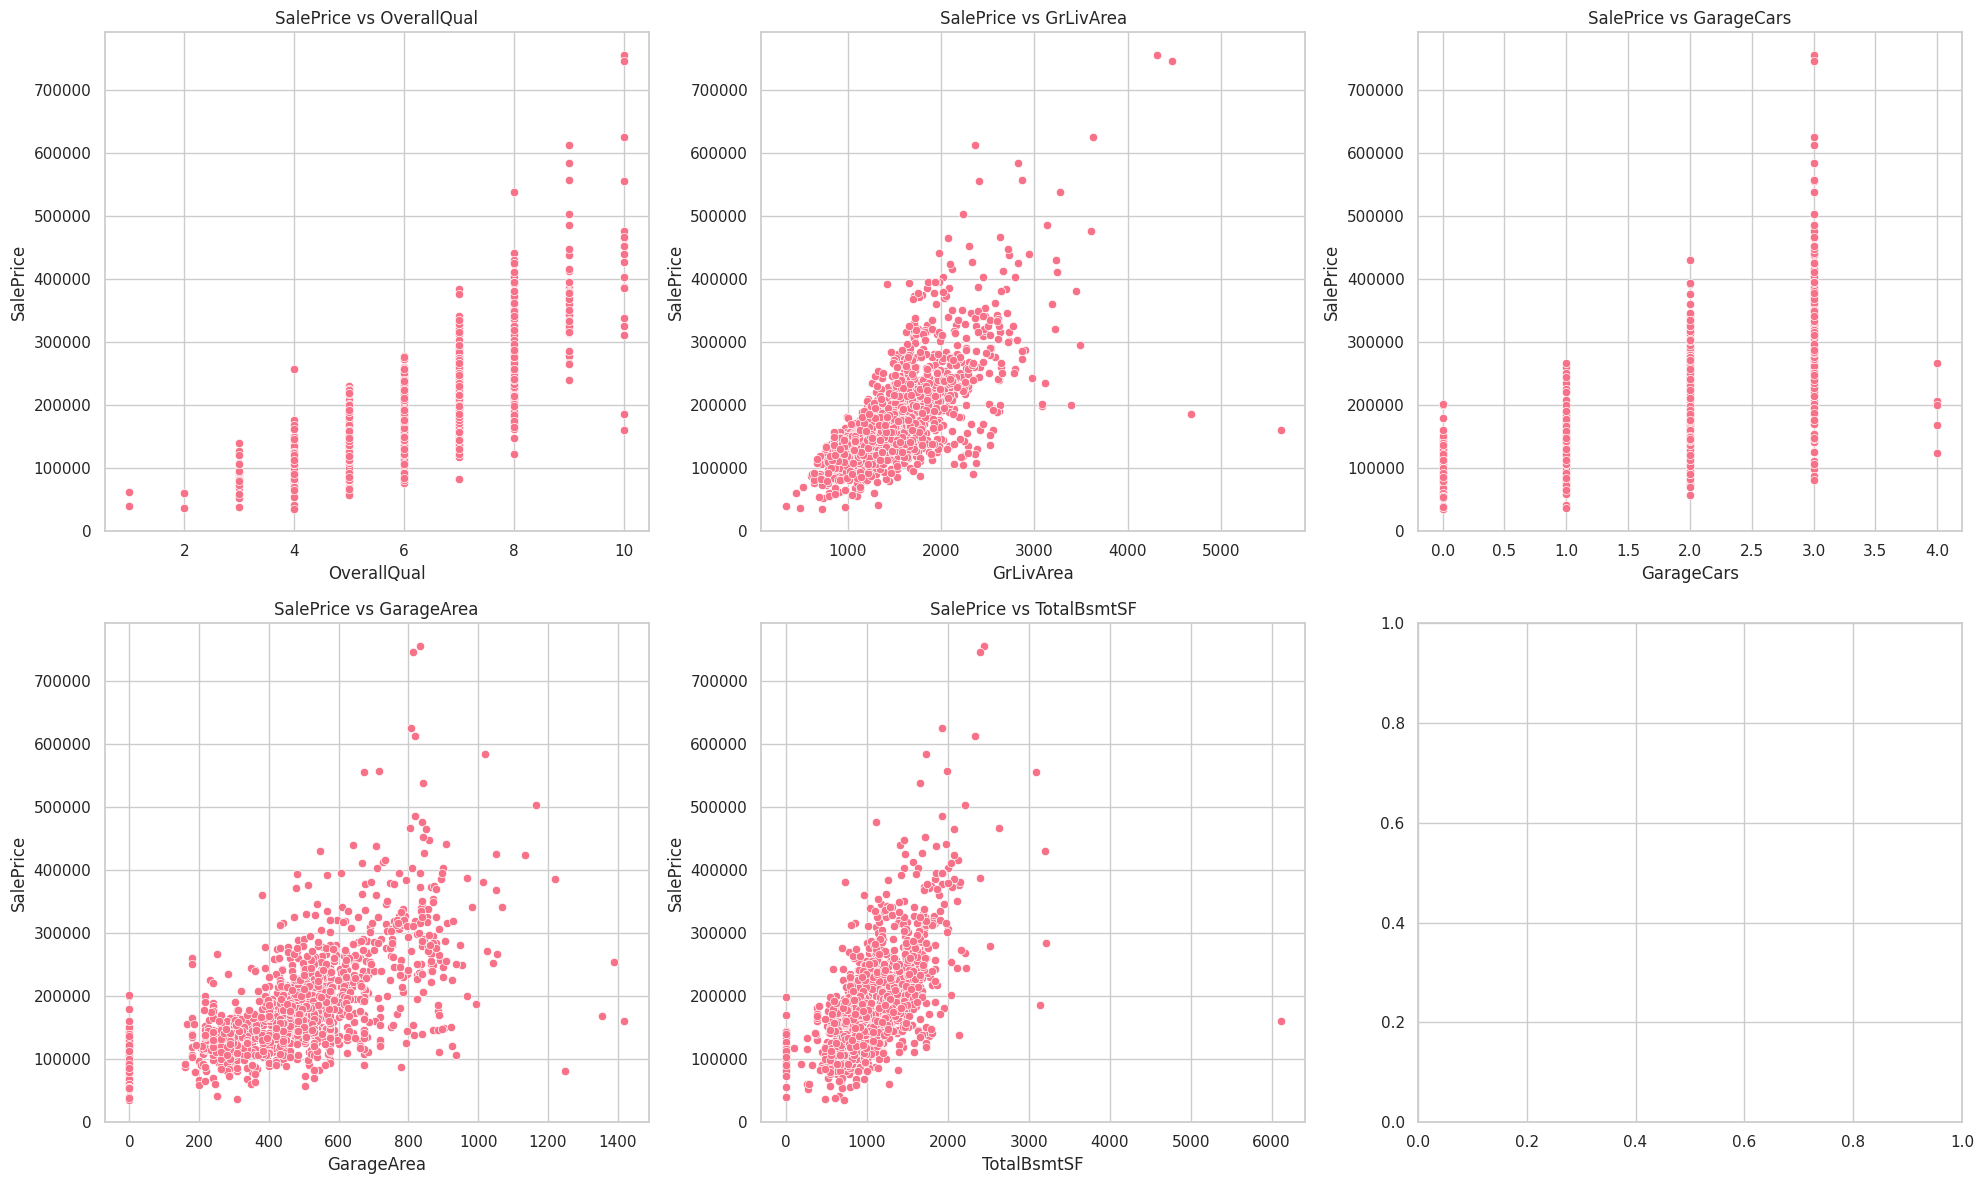

In [ ]:
# Mengambil 5 features dengan korelasi tertinggi terhadap SalePrice
top_corr = correlation_matrix['SalePrice'].sort_values(ascending=False).head(6).index[1:]

# Membuat scatter plot
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, feature in enumerate(top_corr):
    sns.scatterplot(data=train_df, x=feature, y='SalePrice', ax=axes[i])
    axes[i].set_title(f'SalePrice vs {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SalePrice')

plt.tight_layout()
plt.show()

## 5. Model Training dan Evaluasi

### 5.1. Persiapan Data

In [ ]:
# Memisahkan features dan target
X = train_df.drop(['Id', 'SalePrice'], axis=1)
y = train_df['SalePrice']

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

### 5.2. Model Training

In [ ]:
from sklearn.linear_model import LinearRegression

# Inisialisasi model
model = LinearRegression()

# Training model
model.fit(X_train_scaled, y_train)

LinearRegression()

### 5.3. Evaluasi Model

In [ ]:
# Prediksi
y_pred = model.predict(X_val_scaled)

# Menghitung metrik evaluasi
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

MSE: 1246947114.48
RMSE: 35312.14
R-squared: 0.84


## 6. Penjelasan Matematika

### 6.1. Mean Squared Error (MSE)
MSE dihitung dengan rumus:
\[ MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 \]
dimana:
- \(n\) = jumlah sampel
- \(y_i\) = nilai aktual
- \(\hat{y}_i\) = nilai prediksi

### 6.2. Root Mean Squared Error (RMSE)
RMSE adalah akar kuadrat dari MSE:
\[ RMSE = \sqrt{MSE} \]

### 6.3. R-squared (R²)
R-squared dihitung dengan rumus:
\[ R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2} \]
dimana:
- \(\bar{y}\) = rata-rata nilai aktual

## 7. Kesimpulan dan Rekomendasi

Berdasarkan analisis yang telah dilakukan:
1. Feature engineering telah dilakukan dengan menangani missing values dan encoding categorical variables
2. EDA menunjukkan distribusi data dan korelasi antar features
3. Model telah di-train dan dievaluasi menggunakan metrik MSE, RMSE, dan R-squared
4. Untuk meningkatkan performa model, dapat dilakukan:
   - Feature selection untuk mengurangi dimensi
   - Mencoba model lain seperti Random Forest atau XGBoost
   - Hyperparameter tuning